In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import Necessary Libraries
import sys
import os
import glob
import random
import time

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

plt.style.use("dark_background")

In [3]:
!pip install tensorflow

In [4]:
!pip install opencv-python

In [5]:
!pip install opendatasets
!pip install pandas

In [6]:
import opendatasets as od
import pandas

In [7]:
od.download(
    "https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation/data")

# Username - amanw98
# Key - 03a8ecb203f4cb6d2ff5cf46fc8c683c

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amanw98
Your Kaggle Key: ··········


100%|██████████| 714M/714M [00:06<00:00, 114MB/s]


In [8]:
#Set Variables
# Path to all data
DATA_PATH = "/content/lgg-mri-segmentation/kaggle_3m"

# File path line length images for later sorting
BASE_LEN = 89 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
END_IMG_LEN = 4 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_MASK_LEN = 9 # (/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)

# img size
IMG_SIZE = 512

In [9]:
#Link Directotry Name To Directory Path

data_map = []
for sub_dir_path in glob.glob(DATA_PATH+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = sub_dir_path.split("/")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])
    else:
        print("This is not a dir:", sub_dir_path)


df = pd.DataFrame({"dirname" : data_map[::2],
                  "path" : data_map[1::2]})
df.head()

dirname                                               path
0  kaggle_3m  /content/lgg-mri-segmentation/kaggle_3m/README.md
1  kaggle_3m  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
2  kaggle_3m  /content/lgg-mri-segmentation/kaggle_3m/TCGA_F...
3  kaggle_3m  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4  kaggle_3m  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...

In [139]:
# #Data PreProcessing
# # Masks/Not masks
# df_imgs = df[~df['path'].str.contains("mask")]
# df_masks = df[df['path'].str.contains("mask")]

# # Data sorting
# imgs = sorted(df_imgs["path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
# masks = sorted(df_masks["path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))

# # Sorting check
# idx = random.randint(0, len(imgs)-1)
# print("Path to the Image:", imgs[idx], "\nPath to the Mask:", masks[idx])

In [11]:
DataPath = "/content/lgg-mri-segmentation/kaggle_3m"
from glob import glob
import os
dirs = []
images = []
masks = []

# Use glob to find all files matching the pattern
for filepath in glob(os.path.join(DataPath, '**', '*mask*'), recursive=True):
    dirname, filename = os.path.split(filepath)

    # Extract information
    dirs.append(dirname.replace(DataPath, ''))
    masks.append(filename)
    images.append(filename.replace('_mask', ''))

In [12]:
import pandas as pd

imagePath_df = pd.DataFrame({'directory':dirs, 'images': images, 'masks': masks})

In [13]:
imagePath_df['image-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['images']
imagePath_df['mask-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['masks']
print(imagePath_df['image-path'] )

0       /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
1       /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
2       /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
3       /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
4       /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
                              ...                        
3924    /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3925    /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3926    /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3927    /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3928    /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
Name: image-path, Length: 3929, dtype: object


In [14]:
# # Final dataframe
# df = pd.DataFrame({"patient": df_imgs.dirname.values,
#                        "image_path": imgs,
#                    "mask_path": masks})


# Adding A/B column for diagnosis
def positiv_negativ_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : return 1
    else: return 0

imagePath_df["diagnosis"] = imagePath_df["mask-path"].apply(lambda m: positiv_negativ_diagnosis(m))
imagePath_df

directory                        images  \
0     /TCGA_HT_7616_19940813  TCGA_HT_7616_19940813_20.tif   
1     /TCGA_HT_7616_19940813   TCGA_HT_7616_19940813_5.tif   
2     /TCGA_HT_7616_19940813  TCGA_HT_7616_19940813_12.tif   
3     /TCGA_HT_7616_19940813   TCGA_HT_7616_19940813_7.tif   
4     /TCGA_HT_7616_19940813  TCGA_HT_7616_19940813_27.tif   
...                      ...                           ...   
3924  /TCGA_DU_7019_19940908   TCGA_DU_7019_19940908_2.tif   
3925  /TCGA_DU_7019_19940908  TCGA_DU_7019_19940908_24.tif   
3926  /TCGA_DU_7019_19940908  TCGA_DU_7019_19940908_10.tif   
3927  /TCGA_DU_7019_19940908  TCGA_DU_7019_19940908_26.tif   
3928  /TCGA_DU_7019_19940908  TCGA_DU_7019_19940908_23.tif   

                                  masks  \
0     TCGA_HT_7616_19940813_20_mask.tif   
1      TCGA_HT_7616_19940813_5_mask.tif   
2     TCGA_HT_7616_19940813_12_mask.tif   
3      TCGA_HT_7616_19940813_7_mask.tif   
4     TCGA_HT_7616_19940813_27_mask.tif   
...                                 ...   
3924   TCGA_DU_7019_19940908_2_mask.tif   
3925  TCGA_DU_7019_19940908_24_mask.tif   
3926  TCGA_DU_7019_19940908_10_mask.tif   
3927  TCGA_DU_7019_19940908_26_mask.tif   
3928  TCGA_DU_7019_19940908_23_mask.tif   

                                             image-path  \
0     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
1     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
2     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
3     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
4     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...   
...                                                 ...   
3924  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3925  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3926  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3927  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   
3928  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...   

                                              mask-path  diagnosis  
0     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          1  
1     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          0  
2     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          0  
3     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          0  
4     /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...          1  
...                                                 ...        ...  
3924  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...          0  
3925  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...          0  
3926  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...          0  
3927  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...          0  
3928  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...          0  

[3929 rows x 6 columns]

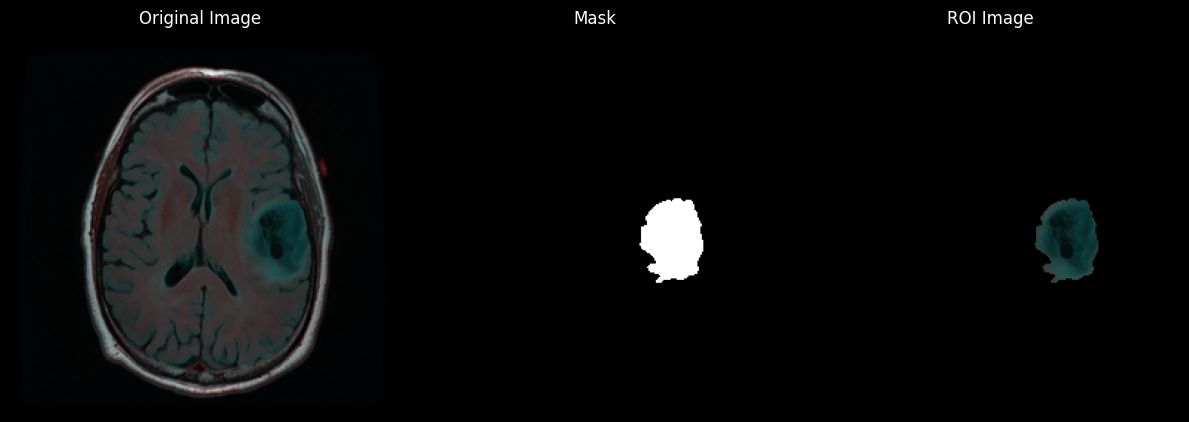

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Choose a random index from your DataFrame
random_index = np.random.randint(0, len(df))

# Get the image and mask paths using the random index
image_path = imagePath_df.loc[random_index, "image-path"]
mask_path = imagePath_df.loc[random_index, "mask-path"]

# Load the image and mask in color
img = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Apply the mask to the image
roi_image = cv2.bitwise_and(img, img, mask=mask)

# Display the original image, mask, and the ROI
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
plt.title("ROI Image")
plt.axis("off")

plt.tight_layout()
plt.show()

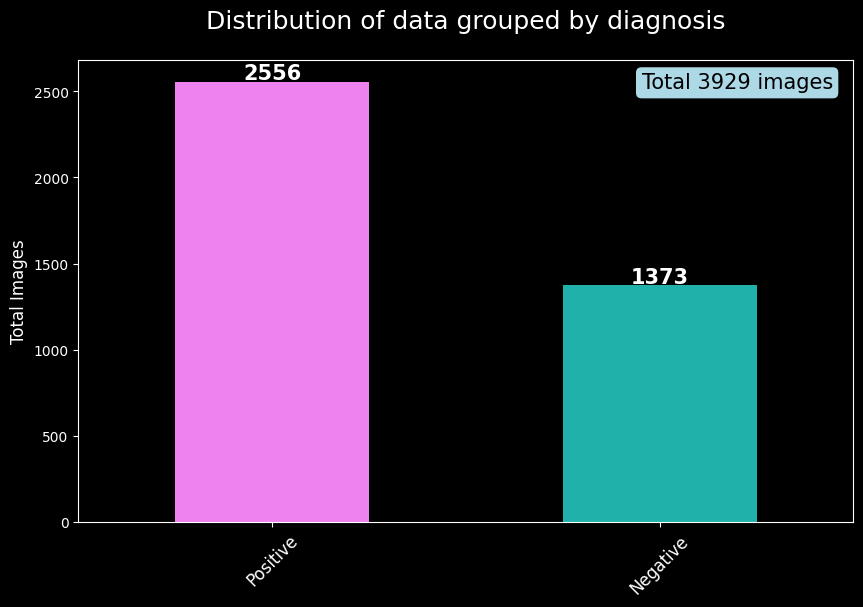

In [40]:
# Plot
ax = imagePath_df.diagnosis.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(10, 6),
                                     color=["violet", "lightseagreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(imagePath_df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12),
                rotation=0, color="white",
                ha="center", verticalalignment='bottom',
                fontsize=15, fontweight="bold")

ax.text(1.2, 2550, f"Total {len(imagePath_df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );

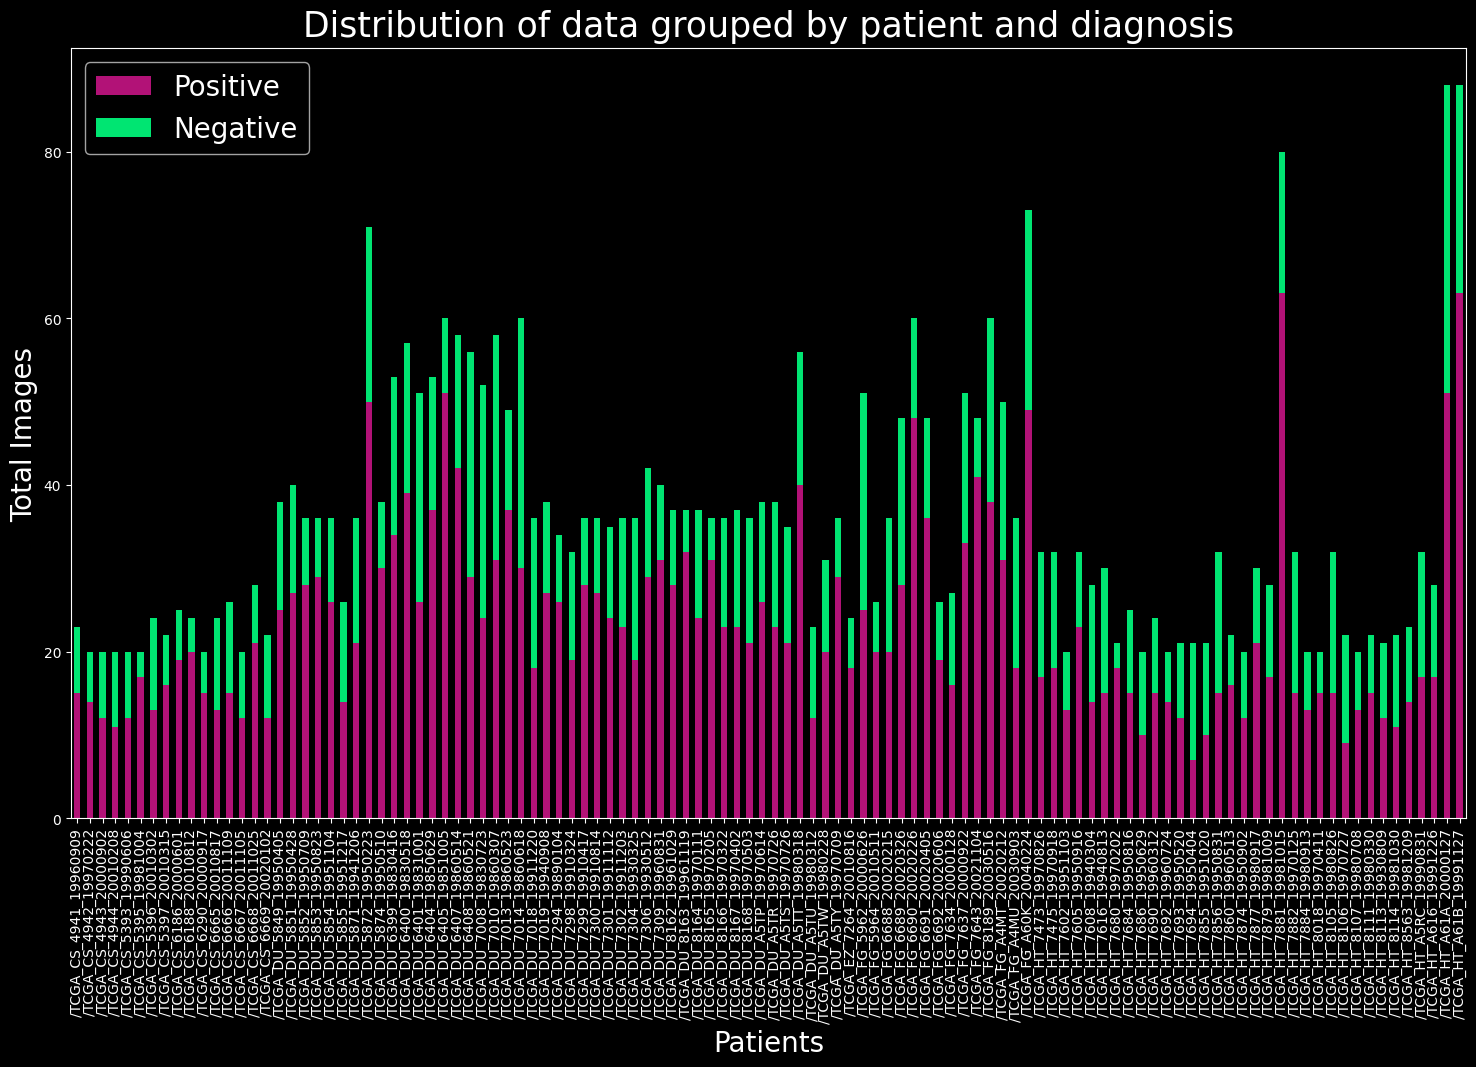

In [41]:
# Data
patients_by_diagnosis = imagePath_df.groupby(['directory', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(18, 10),
                                color=["mediumvioletred", "springgreen"],
                                alpha=0.9)
ax.legend(fontsize=20);
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)

# Annotations
"""for i, rows in enumerate(patients_by_diagnosis.values):
    plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
    plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua")""";

In [46]:
imagePath_df.to_csv("/content/lgg-mri-segmentation/post_processing/classified.csv")

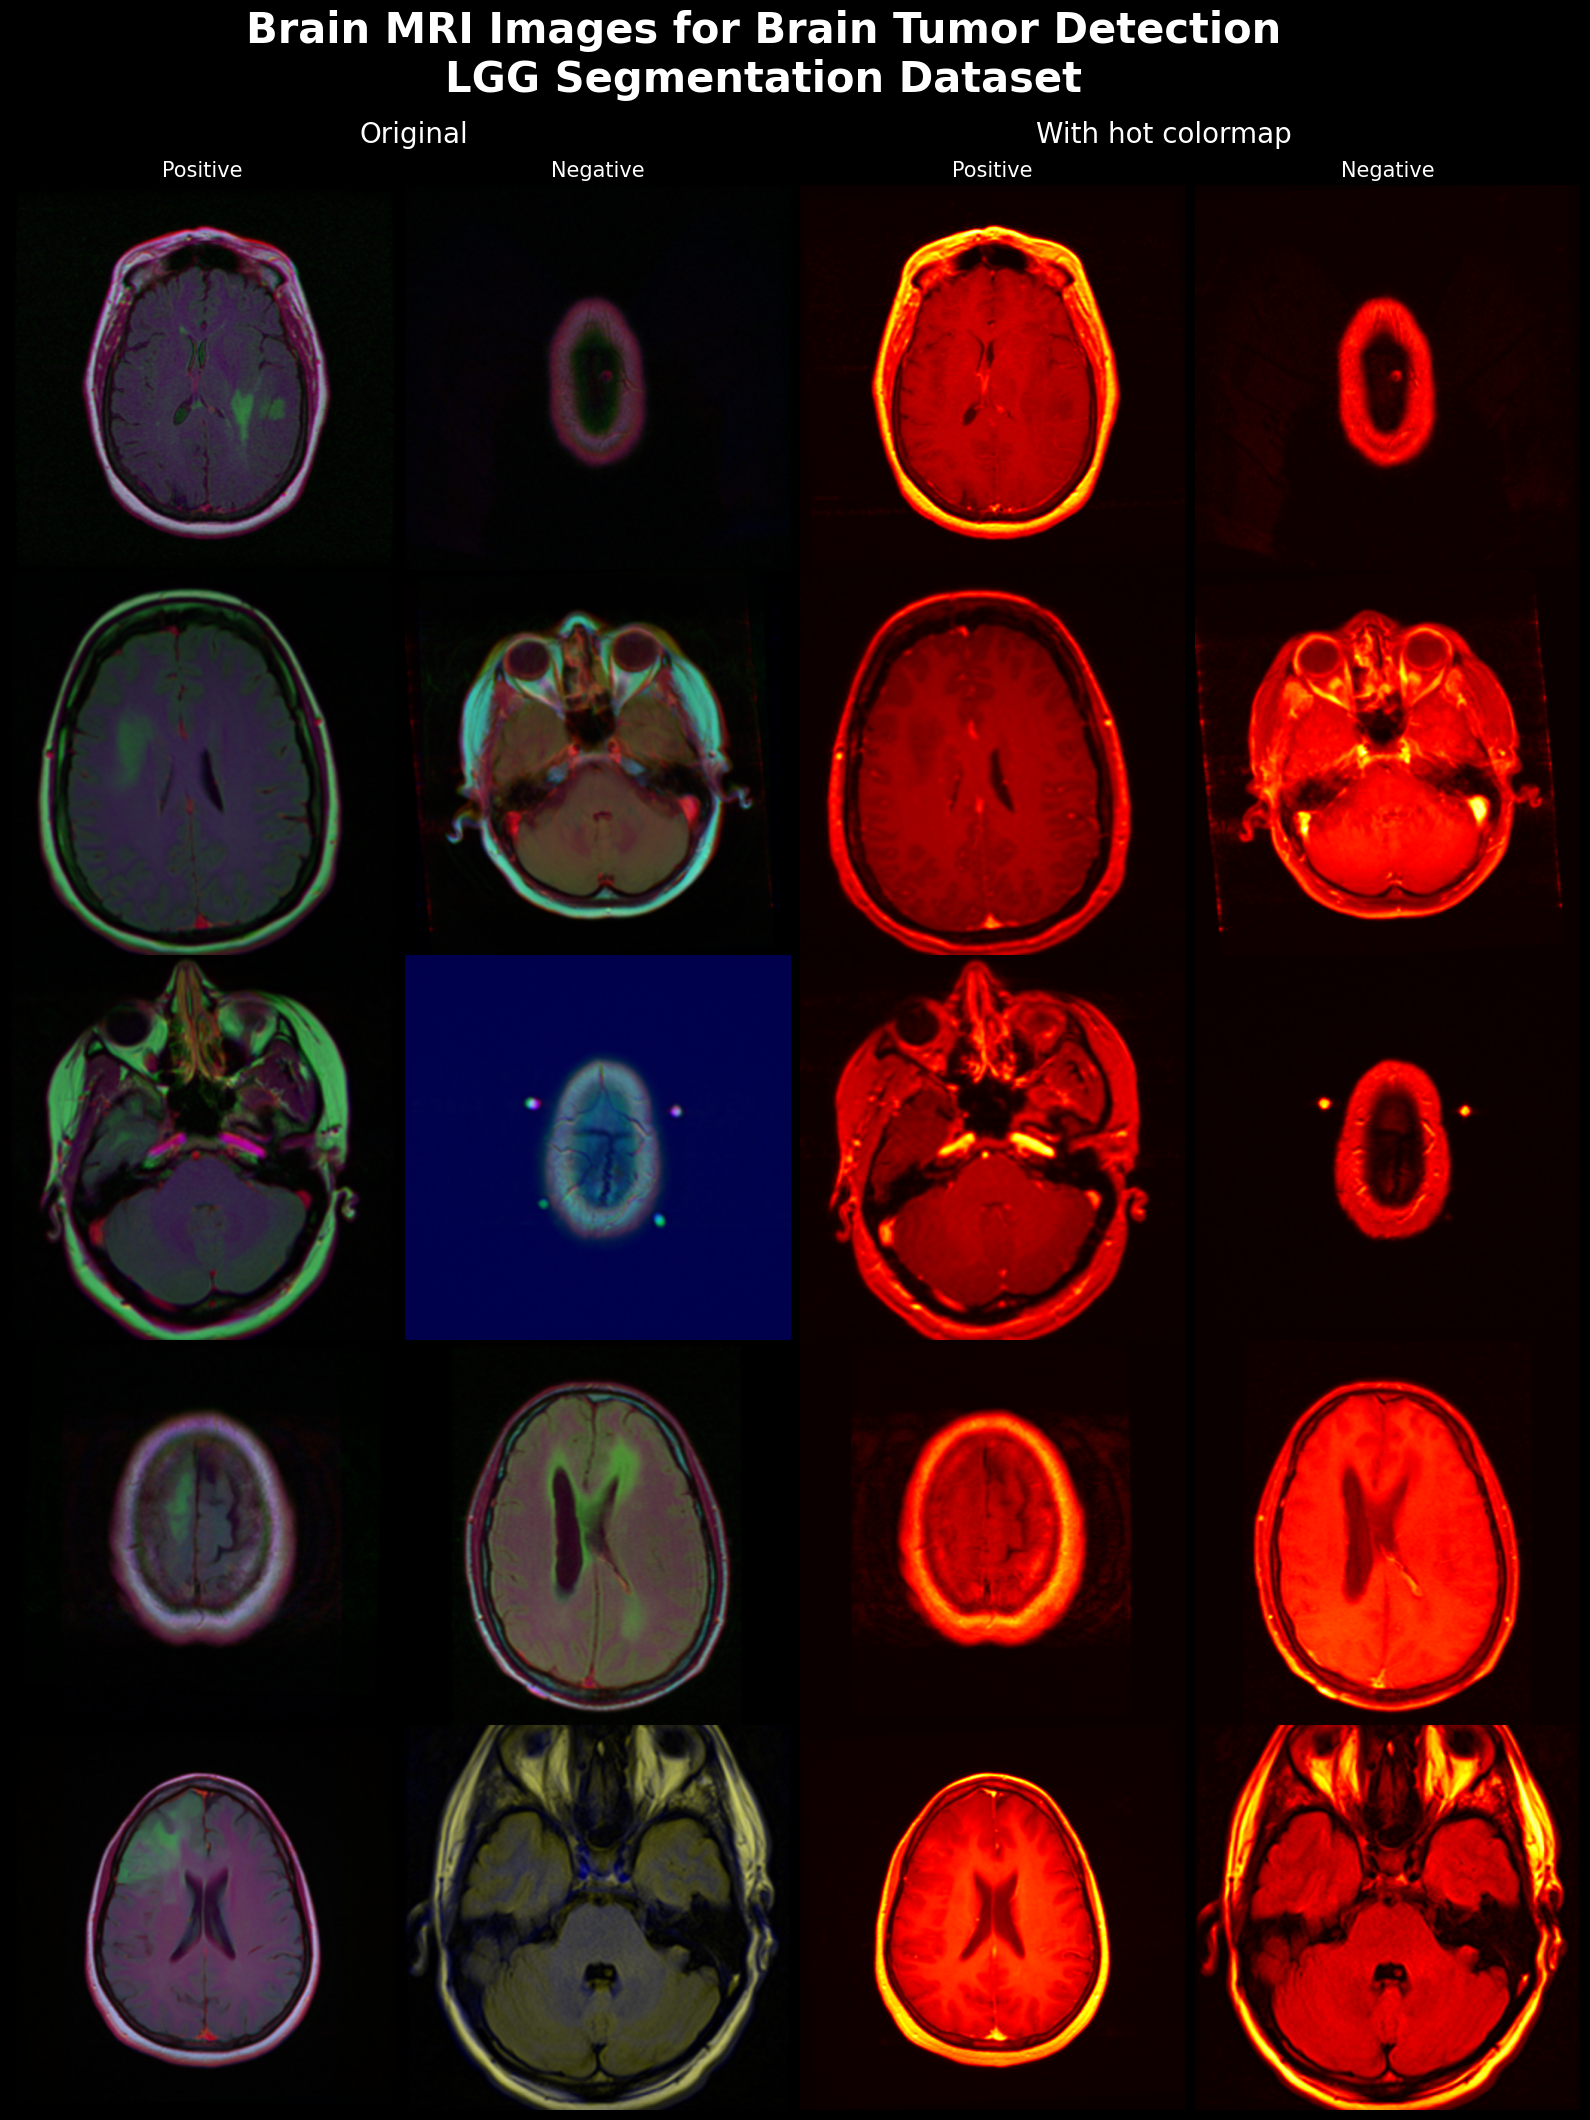

In [52]:
# Data
sample_yes_df = imagePath_df[imagePath_df["diagnosis"] == 1].sample(5)["image-path"].values
sample_no_df = imagePath_df[imagePath_df["diagnosis"] == 0].sample(5)["image-path"].values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])


sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:,:,0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:,:,0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")#set_title("No", fontsize=15)

# annotations
plt.figtext(0.36,0.90,"Original", va="center", ha="center", size=20)
plt.figtext(0.66,0.90,"With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()

In [105]:
def calculate_ASD(tumor_slice):

    nonzero_pts = np.array(np.nonzero(tumor_slice))
    centroid = np.mean(nonzero_pts, axis=1)

    vectors = nonzero_pts - centroid[:,None]
    angles = np.arctan2(vectors[1], vectors[0])
    asd = np.std(angles)

    return asd

In [106]:
from scipy.ndimage import convolve
def calculate_MF(tumor_slice):
    # Assume tumor_slice is a binary image representing the tumor in one slice
    centroid = np.array(np.nonzero(tumor_slice)).mean(axis=1)
    distances = np.linalg.norm(np.array(np.nonzero(tumor_slice)) - centroid[:, np.newaxis], axis=0)
    smoothing_length = int(0.1 * tumor_slice.sum())
    smoothed_distances = convolve(distances, np.ones(smoothing_length) / smoothing_length, mode='nearest')
    margin_fluctuation = np.std(distances - smoothed_distances)
    return margin_fluctuation

In [107]:
import numpy as np
from scipy.spatial import ConvexHull

def calculate_BEVR(tumor_slice):

    # Get the convex hull of the tumor region
    points = np.argwhere(tumor_slice > 0)
    hull = ConvexHull(points)

    # Calculate volume of convex hull
    hull_volume = hull.volume

    # Calculate volume of tumor region
    tumor_volume = np.count_nonzero(tumor_slice)

    # Calculate and return BEVR
    return tumor_volume / hull_volume

(512, 512)
10.7548800022223
1.904811570736421
0.9036539722961763
(512, 512)
13.069505086580074
1.8319810773914131
0.9078967466014967
(512, 512)
2.4172172375937397
1.7662176131780638
0.7855100095328876
(512, 512)
5.3909471455136275
1.8248869426010248
0.9053952321204511
(512, 512)
8.30708747770307
1.9281352829558929
0.7750102561097112


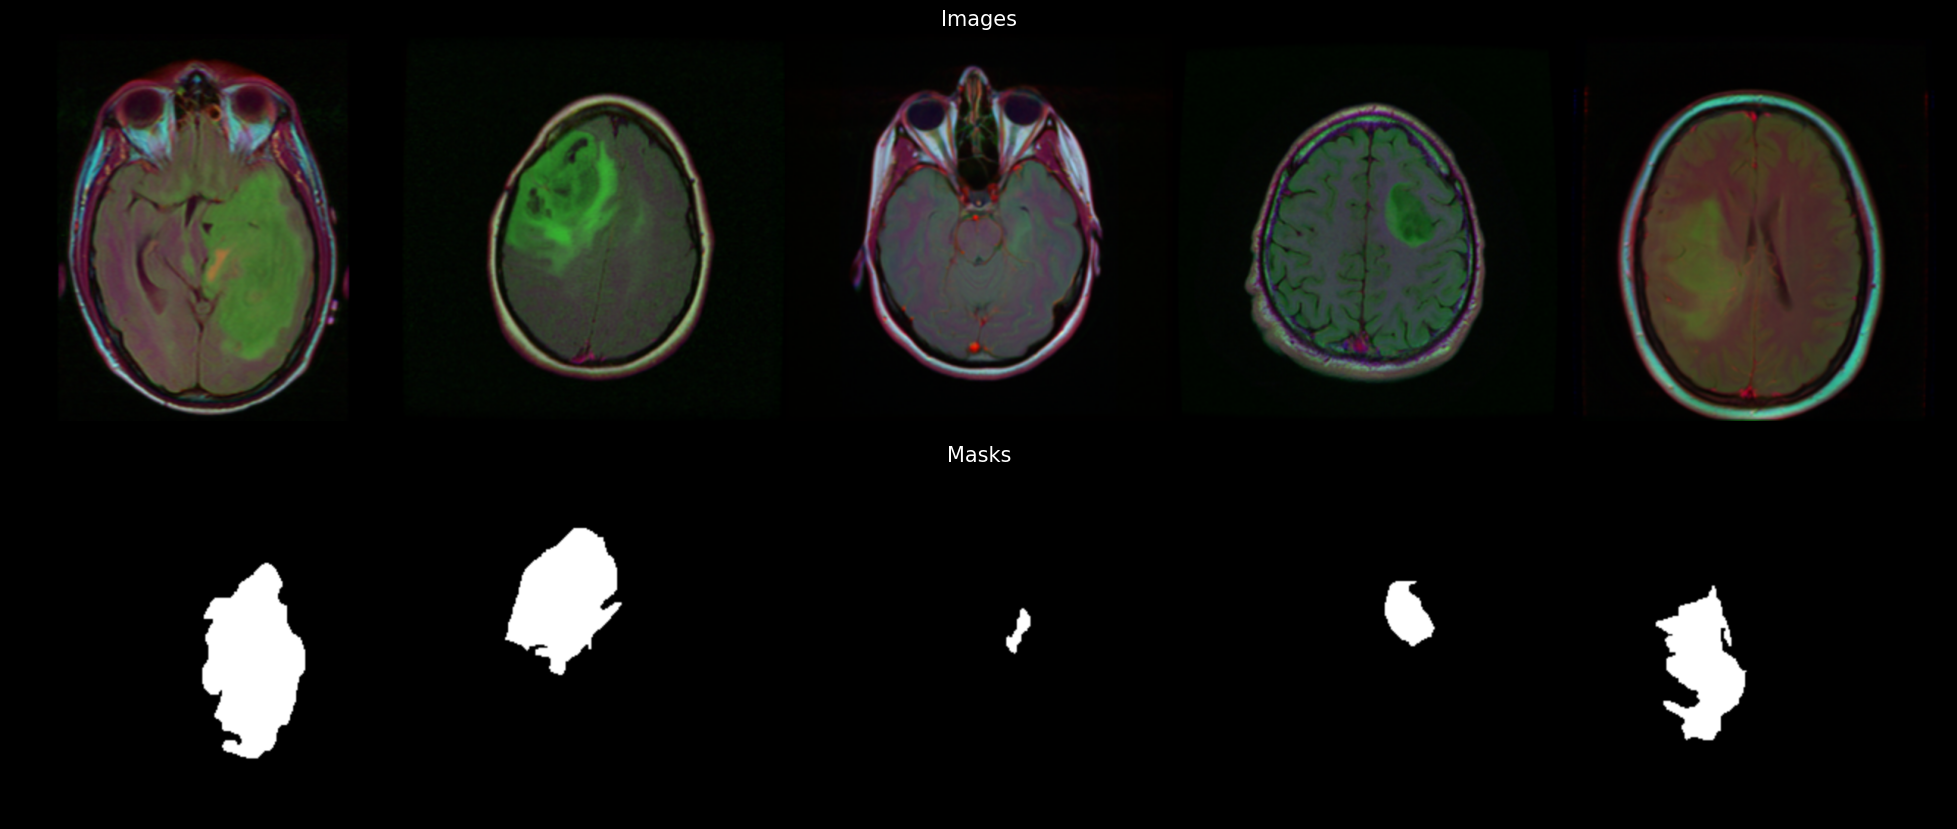

In [109]:
# Data
sample_df = imagePath_df[imagePath_df["diagnosis"] == 1].sample(5).values
sample_imgs = []

for i, data in enumerate(sample_df):
    #print(data)
    img = cv2.resize(cv2.imread(data[3]), (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(cv2.imread(data[4]), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([img, mask])
    # Convert to grayscale if necessary
    gray_img = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Threshold the image to obtain a binary mask
    _, binary_mask = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
    print(binary_mask.shape)
    result_MF = calculate_MF(binary_mask/ 255)
    result_ASD = calculate_ASD(binary_mask/ 255)
    result_BEVR = calculate_BEVR(binary_mask/ 255)
    print(result_MF)
    print(result_ASD)
    print(result_BEVR)

sample_imgs_arr = np.hstack(np.array(sample_imgs[::2]))
sample_masks_arr = np.hstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_imgs_arr)
grid[0].set_title("Images", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_masks_arr)
grid[1].set_title("Masks", fontsize=15, y=0.9)
grid[1].axis("off")
plt.show()

In [113]:
cd

/root


In [111]:
imagePath_df[imagePath_df["diagnosis"] == 1].values.shape

(1373, 6)

In [114]:
results = []

pos_df = imagePath_df[imagePath_df["diagnosis"] == 1]

for i, data in enumerate(pos_df.values):

    directory = data[0]
    img_path = data[3]
    mask_path = data[4]

    img = cv2.resize(cv2.imread(img_path), (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(cv2.imread(mask_path), (IMG_SIZE, IMG_SIZE))

    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    binary_mask = cv2.threshold(gray_mask, 128, 255, cv2.THRESH_BINARY)[1]

    asd = calculate_ASD(binary_mask / 255)
    bevr = calculate_BEVR(binary_mask / 255)
    mf = calculate_MF(binary_mask / 255)

    results.append([directory, asd, bevr, mf])

results_df = pd.DataFrame(results, columns=['directory', 'ASD', 'BEVR', 'MF'])
results_df.to_csv('/content/lgg-mri-segmentation/post_processing/positive_results.csv', index=False)

print('Positive results saved to positive_results.csv')

Positive results saved to positive_results.csv


In [117]:
# Read the data from CSV file into a dataframe
data_df = pd.read_csv('/content/lgg-mri-segmentation/kaggle_3m/data.csv')

# Add '/' at the start of each entry in the 'Patient' column
data_df['Patient'] = '/' + data_df['Patient'].astype(str)

# Save the modified dataframe to a new CSV file
data_df.to_csv('/content/lgg-mri-segmentation/kaggle_3m/data_with_slash.csv', index=False)

In [138]:
data_df = pd.read_csv('/content/lgg-mri-segmentation/kaggle_3m/data_with_slash.csv')
positive_results_df = pd.read_csv('/content/lgg-mri-segmentation/post_processing/positive_results.csv')

# Append the required columns to 'positive_results_df'
required_columns = ['RNASeqCluster', 'miRNACluster', 'CNCluster', 'COCCluster', 'MethylationCluster']
positive_results_df = pd.concat([positive_results_df, pd.DataFrame(columns=required_columns)], axis=1)

# Extract unique 'directory' values from 'positive_results_df'
directories = positive_results_df['directory']

# Iterate over each 'directory' value
for directory_value in directories:
    # Extract the matching row from 'data_df'
    matching_row = data_df[data_df['Patient'] == directory_value]

    # Update the required columns in 'positive_results_df'
    positive_results_df.loc[positive_results_df['directory'] == directory_value, required_columns] = matching_row[required_columns].values

# Display the final results
print("Final Results:")
print(positive_results_df)

positive_results_df.to_csv('/content/lgg-mri-segmentation/post_processing/positive_results_updated.csv', index=False)

Final Results:
          directory       ASD      BEVR         MF RNASeqCluster miRNACluster  \
0     /TCGA_HT_7616  1.857552  0.908429  11.081471           3.0          2.0   
1     /TCGA_HT_7616  1.914587  0.912825   5.424240           3.0          2.0   
2     /TCGA_HT_7616  1.841438  0.868489  10.081094           3.0          2.0   
3     /TCGA_HT_7616  1.822203  0.866326  13.343031           3.0          2.0   
4     /TCGA_HT_7616  1.905342  0.748183   3.549390           3.0          2.0   
...             ...       ...       ...        ...           ...          ...   
1368  /TCGA_DU_7019  1.550222  0.532578   4.447159           NaN          2.0   
1369  /TCGA_DU_7019  1.861533  0.826210   9.833700           NaN          2.0   
1370  /TCGA_DU_7019  1.871903  0.897653   9.766139           NaN          2.0   
1371  /TCGA_DU_7019  1.808135  0.888889   5.296780           NaN          2.0   
1372  /TCGA_DU_7019  1.817548  0.939388   7.294671           NaN          2.0   

     CNClust

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/lgg-mri-segmentation/post_processing/positive_results_updated.csv')

# Convert relevant columns to numeric
numeric_columns = ['BEVR', 'MF', 'ASD', 'RNASeqCluster', 'miRNACluster', 'CNCluster', 'COCCluster']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot box plots for associations
associations = ['BEVR', 'MF', 'ASD']
for association in associations:
    plt.figure()
    df.boxplot(column=association, by='RNASeqCluster', vert=False)
    plt.title(f"{association} vs RNASeqCluster")
    plt.savefig(f"{association.lower()}_vs_rnaseqcluster_box.png")
    plt.clf()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>